In [1]:
import numpy as np                    ## numpy lib is used for computataional purpose
import matplotlib.pyplot as plt       ## matplotlib is used for visualization purpose


In [2]:
X = np.load("E:\PYTHON_BASIC\Data Science\KNN\Regression\X_data.npy")  # absolute address - remember first letter of the address should be capital as Regression R should be capital
y = np.load("E:\PYTHON_BASIC\Data Science\KNN\Regression\Y_data.npy")

In [3]:
print(X.shape , y.shape)

(50, 1) (50,)


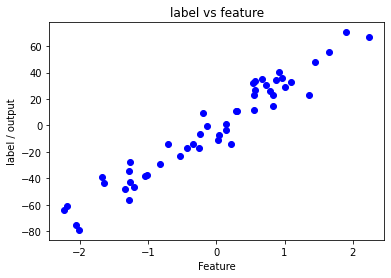

In [4]:
plt.scatter(X , y , c="blue")
plt.xlabel("Feature")
plt.ylabel("label / output")
plt.title("label vs feature")
plt.show()

In [7]:
class KNNregressor:
    
    def __init(self , k = 3):
        self.k = k
        
    def fit(self , Xtrain , ytrain):
        self.xtrain = Xtrain
        self.ytrain = ytrain
        
    def predict(self , Xtest_point):
        prediction = np.empty(len(Xtest_point))
        idx = []
        for i in range(Xtest_point.shape[0]): ## equivalent len(Xtest_point)
            distance = np.linalg.norm(Xtest_point[i] - self.xtrain, ord=2, axis=1) 
           # distance = np.linalg.norm(Xtest_point(i) - self.xtrain , ord = 2 , axis = 1) ## ord = 2 for eucliden distance
            knn_idx = np.argsort(distance)[3]
            idx.append(knn_idx)
            prediction[i] = self.ytrain[idx].mean()
        return prediction , idx


In [28]:
model = KNNregressor()
model.fit(X, y)
test_point = np.array([[0.45]])
print(test_point)
pred, knn_idx = model.predict(test_point)
print(pred, knn_idx)

[[0.45]]
[26.67676961] [48]


In [47]:
class KNNregressor2:
    
    def __init(self , k=3):
        self.k = k
        
    def fit(self , X , y):
        self.xtrain = X
        self.ytrain = y
        
    def predict(self , Xtest):
        
        predicted = np.empty((len(Xtest)))
        idx = []
        for i in range(len(Xtest)):
            dist = np.linalg.norm(Xtest[i] - self.xtrain , ord = 2 , axis = 1)
            knn = np.argsort(dist)[:3]
            idx.append(knn)
            predicted[i] = self.ytrain[idx].mean()
        return predicted , knn

In [48]:
model2 = KNNregressor2()
model2.fit(X , y)
xtest = [[0.45]]
print(xtest)
i , x = model2.predict(xtest)
print(i , x)

[[0.45]]
[22.41368721] [34 43 14]


C:\Users\SUBHAJ~1\AppData\Local\Temp/ipykernel_14008/596208664.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  predicted[i] = self.ytrain[idx].mean()


In [30]:
type(x), type(x[0]), x[0]

(numpy.ndarray, numpy.int64, 34)

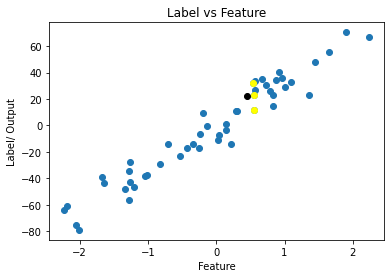

In [36]:
plt.scatter(X , y)
plt.scatter(xtest , i , c = "black")
plt.scatter(X[x] , y[x] , c = "yellow")
plt.xlabel("Feature")
plt.ylabel("Label/ Output")
plt.title("Label vs Feature")
plt.show()

In [37]:
idx = [34, 43, 14]
X[idx]

array([[0.54500464],
       [0.54820748],
       [0.55003505]])

In [38]:
y[idx]

array([32.40155139, 23.15440311, 11.68510712])

## Plotting prediction line

In [59]:
class KNNregressor:
    
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, Xtrain, ytrain):
        self.xtrain = Xtrain
        self.ytrain = ytrain
        
    def predict(self, X_test):
        prediction = np.empty((len(X_test)))
        idx = []
        for i in range(len(X_test)):
            # compute the distance
            distance = np.linalg.norm(X_test[i] - self.xtrain, ord=2, axis=1)
            knn_idx = np.argsort(distance)[:self.k]
            idx.append(knn_idx)
            prediction[i] = self.ytrain[knn_idx].mean()
        return prediction, idx

In [60]:
model4 = KNNregressor()
model4.fit(X, y)

In [62]:
f1 = np.linspace(X[:,0].min() , X[:,0].max() , 100).reshape(-1 ,1)  ## it shape should be same of train data i.e 2d
print(f1.shape)
predictionn = model4.predict(f1)[0]
print(predictionn.shape)


(100, 1)
(100,)


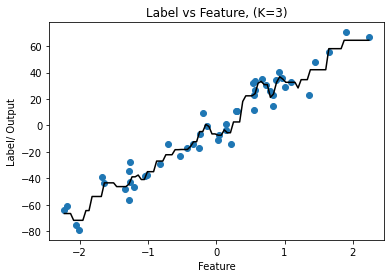

In [66]:
plt.scatter(X , y)
plt.plot(f1 , predictionn , c = "black")
plt.xlabel("Feature")
plt.ylabel("Label/ Output")
plt.title(f"Label vs Feature, (K={model4.k})")
plt.show()

## in the plot we have some straight line in btw , that is because
## the point of x test have same neighbours that why we get straight line in btw

In [67]:
print(predictionn)

[-66.62301138 -66.62301138 -66.62301138 -71.74826414 -71.74826414
 -71.74826414 -71.74826414 -64.37802394 -64.37802394 -53.72437624
 -53.72437624 -53.72437624 -53.72437624 -43.41394767 -43.41394767
 -43.41394767 -43.41394767 -46.24815781 -46.24815781 -46.24815781
 -46.24815781 -44.36000006 -38.86133696 -38.86133696 -37.51337565
 -40.88666072 -40.88666072 -34.95867951 -34.95867951 -34.95867951
 -26.92875367 -26.92875367 -26.92875367 -22.14854865 -22.14854865
 -22.14854865 -18.32270693 -18.32270693 -18.17268219 -18.17268219
 -18.17268219 -15.95241833 -12.30817672 -12.30817672  -4.62703129
  -4.62703129   0.79685187  -0.78516404  -6.38597835  -6.38597835
  -7.36760973  -7.36760973  -3.33709998  -5.51102485  -5.51102485
   2.6546512    2.6546512    2.6546512   18.1585781   22.41368721
  22.41368721  22.41368721  24.03470393  31.97075723  33.33307137
  30.87994902  30.87994902  21.22141339  23.81324276  32.60235888
  36.84367833  35.17158155  32.65104992  32.65104992  32.65104992
  32.65104

In [69]:
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor

In [71]:
model5 = KNeighborsRegressor()
model5.fit(X , y)
pred = model5.predict(f1)
print(pred)

[-63.54978048 -63.54978048 -63.54978048 -63.54978048 -63.54978048
 -63.54978048 -63.54978048 -59.4817957  -59.4817957  -59.4817957
 -59.4817957  -56.90099784 -56.90099784 -44.1817319  -44.1817319
 -44.1817319  -44.1817319  -44.89018351 -41.7441446  -41.7441446
 -41.7441446  -41.7441446  -41.45016547 -41.45016547 -37.83208787
 -38.52724635 -38.52724635 -35.80937315 -33.15266441 -33.15266441
 -33.15266441 -28.49957336 -28.49957336 -24.29497191 -24.29497191
 -19.5242773  -19.5242773  -19.5242773  -17.09581665 -15.52262574
 -15.52262574 -15.52262574  -9.01136688  -9.01136688  -5.62408137
  -5.62408137  -5.09011485  -5.09011485  -3.27150289  -4.31615606
  -4.31615606  -7.05622892  -7.05622892  -2.58758259   1.10822167
   1.10822167   1.10822167  12.70398162  17.8630489   20.96167957
  25.53201326  25.53201326  25.53201326  26.15035638  27.67221817
  28.1612862   25.98424384  25.71726167  27.72285871  29.56248143
  32.50602481  34.58064063  34.58064063  34.58064063  34.58064063
  32.29295637

In [72]:
KNeighborsClassifier?